<center>
<h1> <b>Métodos numéricos</b> </h1>
<h3> <b>Segundo cuatrimestre 2021</b> </h3>
<br>
<h1> <b>Práctica 4: Ecuaciones parabólicas</b> </h1>
<h3> Cátedra: Pablo Dmitruk </h3>
<br>
<h3> Fecha límite de entrega: 22 de octubre de 2021 23:59 </h3>
</center>

### Entrega de:   **COMPLETAR CON SUS NOMBRES**

- [Ejercicios](#ejercicios)

- [Repaso teórico](#explicacion)

Si bien la temática de la práctica es la de **ecuaciones parabólicas**, para fijar ideas, y dado que las estrategias aquí vistas pueden generalizarse a otras EDPs parabólicas, **vamos a centrarnos en la ecuación de difusión** a difusividad constante,
\begin{equation*}
    \frac{\partial f}{\partial t} - \nu \nabla^2 f = 0.
\end{equation*}
$f$ es la cantidad difundida (que puede ser escalar o vectorial) y $\nu$ es la difusividad, que tiene unidades de $[\nu] = L^2/T$ (longitud al cuadrado sobre tiempo). Un ejemplo muy común, donde a $f$ suele denotarselo $T$ y a $\nu$, $\kappa$, es la difusión de la temperatura (i.e., la ecuación de calor).

<a name="ejercicios"></a>

# **Ejercicios**

## **Problema 1: Condición de CFL para la ecuación de calor 1D**

Encuentre la condición de _Courant–Friedrichs–Lewy_ (CFL), para la ecuación de difusión 1D (una dimensión espacial):

> $\text{a)}$ a partir de análisis dimensional (con esto solo podrán determinar la forma funcional de la condición);

> $\text{b)}$ a partir de estudiar el factor de amplificación para el esquema que combina Euler adelantado en tiempo y diferencias finitas centradas de segundo orden en espacio.

**Su resolución acá**

---

## **Problema 2: Estabilidad de esquemas explícitos**

Considere la ecuación de difusión 1D con condiciones de contorno de Dirichlet en el dominio $x \in [0, 1]$, $t \in [0, 15]$:
\begin{equation*}
    \frac{\partial f}{\partial t} - \nu \frac{\partial^2 f}{\partial x^2} = 0, \qquad \qquad \begin{cases}f(t,0) &= 0,\\
    f(t,1) &= 1,\\
    f(0,x) &= x^2.
\end{cases}
\end{equation*}

> $\text{a)}$ Escriba una función `integrar_difusion_1d_euler` que permita integrar la ecuación de advección con condiciones de contorno de tipo Dirichlet que no dependen del tiempo. El mismo debe utilizar diferencias finitas centradas de segundo orden en espacio y Euler adelantado para la integración temporal. _Ayuda: utilice lo aprendido en la práctica 1 para evolucionar solo los puntos interiores al dominio. Para mayor facilidad le proporcionamos un esqueleto de la función a implementar._

> $\text{b)}$ Empleando $\nu = 1 \times 10^{-1}$, integre el problema hasta $t_f=15$ utilizando $N_x \in \{64; 128; 256 \}$ puntos de grilla totales (incluyendo contornos). En todos los casos experimente con los valores de $\Delta t$ hasta hallar el valor máximo $\Delta t^\text{crít}$ para el cual obtiene una integración estable (alcanza con obtener $\Delta t^\text{crít}$ con 2 cifras significativas). Use la condición de CFL para probar valores de manera educada.

Gracias al conocimiento físico que tenemos sobre este problema, podemos concluir que para $t \gtrsim 1/ \nu = 10$ la solución transitoria deja de ser dominante y debería obtenerse un perfil escencialmente lineal dado por $f(x) = x$. Verifique que en todos los casos obtiene una convergencia a esta solución.

> $\text{c)}$ Grafique en escala loglog $\Delta t^\text{crít}$ vs. $\Delta x$. ¿Obtiene la relación funcional esperada?

**Su resolución acá**

In [ ]:
# Su resolución acá
import numpy as np
import matplotlib.pyplot as plt

def integrar_difusion_1d_euler(f0, cc, dx, dt, tf, nu):
    """
    Integra la ecuación de difusión 1D con condiciones de contorno de Dirichlet
    (estacionarias). Utiliza diferencias finitas de segundo orden para la parte 
    espacial y Euler adelantado para la parte temporal.

    Entradas:
        `f0`: Vector (NX) con las condiciones iniciales para todos los puntos de
                la grilla (incluídos los contornos).
        `cc`: Arreglo (2) con la condición de Dirichlet para cada uno de los
                contornos.
        `dx`: Espaciamiento entre puntos en espacio.
        `dt`: Espaciamiento entre puntos en tiempo.
        `tf`: Tiempo final de integración.
        `nu`: Difusividad (constante).
    
    Salida:
        `f`:  Arreglo bidimensional f(t,x) con la solución para cada paso
                temporal y para cada punto de la grilla (incluyendo los
                contornos).
    """
    from scipy.sparse import diags

    nx    = f0.size - 2                 # Cantidad de puntos interiores

    pasos = int(round(tf/dt))           # Cantidad de pasos temporales

    f     = np.zeros( (pasos+1, nx) )   # Variable para guardar la integración
    f[0]  = f0[1:-1]                    # Condición inicial

    # -------------- NO MODIFICAR ARRIBA DE ESTA LÍNEA -------------------------

    # COMPLETAR: Obtener operadores que permitan estimar la derivada segunda en
    # cada punto interior del dominio. Recuerde que para ajustar el primer y el
    # último punto interior deberá utilizar un vector que contemple las
    # condiciones de contorno.
    # --------------------------------------------------------------------------

    for n in range(pasos):
        # COMPLETAR: Integrar utilizando Euler adelantado

    # ----------------- NO MODIFICAR DEBAJO DE ESTA LÍNEA ----------------------
    
    # Agrego los bordes y devuelvo el resultado de la integración
    f = np.hstack((cc[0]*np.ones((pasos+1,1)), f, cc[1]*np.ones((pasos+1,1)) ))
    
    f[0,[0,-1]] = f0[[0,-1]]
    return f

---

## **Problema 3: Crank-Nicolson y diferencias finitas centradas (1D)**

Escriba una función `integrar_difusion_1d_cn` que utilice el esquema de Crank-Nicolson para integrar en tiempo la ecuación de difusión con condiciones de tipo Dirichlet, considerando un operador centrado de segundo orden para estimar la derivada segunda espacial. Luego, repita la integración llevada a cabo en el problema anterior, obteniendo el valor $\Delta t^\text{crít}$ para cada resolución espacial. _Ayuda: intente primeramente expresar el problema de la forma_
\begin{equation*}
    \mathbf f^{n+1} = A \mathbf g^n,
\end{equation*}
_donde $A$ es una matriz independiente del tiempo y $\mathbf g$ un vector que depende de $\mathbf f^n$._

**Su resolución acá**

In [ ]:
# Su resolución acá

---

## **Problema 4: Orden de esquemas para la ecuación de difusión**

Considere ahora la ecuación de difusión 1D con condiciones de contorno periódicas en el dominio $x \in [0, 2\pi)$, $t \in [0, 1]$:
\begin{equation*}
    \frac{\partial f}{\partial t} - \nu \frac{\partial^2 f}{\partial x^2} = 0, \qquad \qquad
    f(0,x) = \mathrm{sen}(kx).
\end{equation*}

Empleando $\nu = 1 \times 10^{-1}$ y $k = 1$, integre este sistema utilizando diferencias finitas centradas de sexto orden conjugadas con los siguientes integradores temporales:

> $\text{a)}$ Euler adelantado;

> $\text{b)}$ Runge-Kutta de segundo orden (punto medio);

> $\text{c)}$ Crank-Nicolson.

_Ayuda: Puede usar la función `diferenciacion_centrada_periodica` definida en el apunte que acompaña a esta práctica para obtener un operador de sexto orden espacial._

<br>

Este problema tiene como solución analítica $f(t,x) = e^{-\nu k^2 t} \mathrm{sen}(kx)$. Puede obtener un arreglo `f[t, x]` mediante la siguiente función
```python
def difusion_seno_analitica(x, t, k, nu):
    f = np.exp(-nu*k**2*t[:,None])*np.sin(k*x[None,:])
    return f
```
Utilizando esta información:

> $\text{d)}$ Integre este problema para los métodos anteriores fijando $N_x = 64$ puntos de grilla y considerando $\Delta t = \{2,5\times10^{-2}; 1\times 10^{-2};5\times10^{-3}; 2,5\times 10^{-3}\}$. Calcule la norma infinito del error para cada caso y grafíquela en función de $\Delta t$. ¿Qué orden de convergencia temporal observa en cada caso?


In [ ]:
# Su resolución acá

---

## **Problema 5: Ecuación de difusión (2D)**
Considere ahora el problema de difusión 2D en el dominio $(x,y) \in [0, L_x] \times [0, L_y]$, $t \in [0, t_f]$ con condiciones de contorno de Dirichlet estacionarias, dado por
\begin{equation*}
\frac{\partial f}{\partial t} - \nu \nabla^2 f = 0, \qquad \qquad \begin{cases}
f(t, 0, y)   &= g(y)\\
f(t, L_x, y) &= h(y)\\
f(t, x, 0)   &= u(x)\\
f(t, x, L_y) &= v(x)\\
f(0, x, y)   &= f_0(x,y)
\end{cases}.
\end{equation*}
Se permite además la presencia de discontinuidades en los puntos $(x,y) \in \{(0,0); (0,L_y); (L_x, 0); (L_x,L_y)\}$ (i.e. en las esquinas).

El objetivo de este ejercicio es escribir una función `integrar_difusion_2d` que integre la ecuación de difusion 2D con condiciones de contorno de tipo Dirichlet estacionarias. La misma deberá recibir la condición inicial, la condición sobre cada uno de los cuatro contornos, el espaciamiento de cada grilla, el paso temporal y la difusividad. La integración deberá llevarse a cabo utilizando diferencias finitas centradas de segundo orden en cada una de las direcciones espaciales y un integrador temporal de tipo Runge-Kutta explícito de orden ajustable.

En la siguiente celda se adjunta un esqueleto del código que se encarga de seleccionar los puntos interiores (los únicos que hay que evolucionar en el tiempo) y de volver a agregar los contornos al final de la integración. Deberán implementar ustedes los operadores de derivación, agregando términos apropiados para contemplar las condiciones de contorno. Para validar su código le sugerimos que itere entre las siguientes actividades:

> $\text{a)}$ Complete la función `integrar_difusion_2d`.

<br>

Considerando $L_x = L_y = 1$, $N_x = N_y = 32$, $\nu = 10^{-1}$, $\Delta t = 10^{-3}$ y $t_f = 15$:

> $\text{b)}$ Verifique que para $g = h = u = v = f_0 = 1$ obtiene la solución
$f(t,x,y) = 1$.

> $\text{c)}$ Verifique que para $g = 0$, $h = 4$, $u = v = 4x/L_x$ y $f_0 = 0$ su solución converge a la solución estacionaria $f(x,y) = 4x/L_x$. _Ayuda: puede graficar un perfil la solución obtenida para 3 o 4 cortes con valores representativos de la coordenada $y$ (ej: cerca de los bordes y en el centro) y verificar que obtiene la recta mencionada._

> $\text{d)}$ Verifique que para $g = 0$, $h = 4$, $u = 2$, $v=5$, $f_0 = 0$ obtiene resultados consistentes con la Figura 1.

<br>

> $\text{e)}$ Utilizando las mismas condiciones iniciales y de contorno que en el problema $\text{d)}$, pero considerando $L_x = 1$, $L_y = 3$, $N_x = 32$, $N_y = 128$, debería obtener resultados consistentes con la Figura 2.

_Ayuda: Para los incisos $\text{d)}$ y $\text{e)}$ recuerde que dado un arreglo `f(x,y)` que representa los valores de la función sobre el producto cartesiano de las grillas `x` e `y`, puede obtener un mapa de color de `f` como_
```python
fig, ax = plt.subplots(1,1)
col = ax.imshow(f.T, origin="lower", extent=(x[0], x[-1], y[0], y[-1]) )
fig.colorbar(col)
```

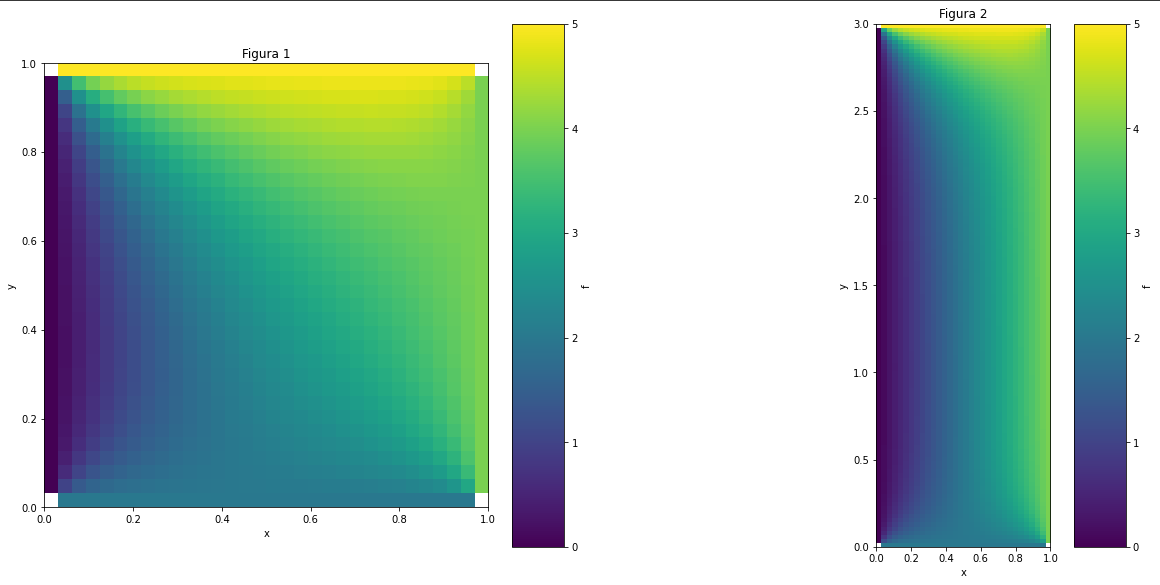

**Su resolución acá**

In [ ]:
# Su solución acá

import numpy as np
import matplotlib.pyplot as plt

def integrar_difusion_2d(f0, ccx, ccy, dx, dy, dt, tf, nu, orden_t=1):
    """
        Integra la ecuación de difusión 2D con condiciones de contorno de tipo
    Dirichlet estacionarias. Utiliza diferencias finitas de segundo orden para
    la parte espacial y un método de Runge-Kutta explícito de orden variable
    para la parte temporal.

    Entradas:
        `f0`:  Arreglo bidimensional (NX,NY), con las condiciones iniciales para
                todos los puntos de la grilla (incluídos los contornos).
        `ccx`: Arreglo bidimensional (2,NY) con los valores con la condición de
                Dirichlet para x=0 (ccx[0]) y x=Lx (ccx[1]).
        `ccy`: Arreglo bidimensional (2,NX) con los valores con la condición de
                Dirichlet para y=0 (ccy[0]) y y=Ly (ccy[1]).                
        `dx`: Espaciamiento entre puntos en la dirección x.
        `dy`: Espaciamiento entre puntos en la dirección y.
        `dt`: Espaciamiento entre puntos en tiempo.
        `tf`: Tiempo final de integración.
        `nu`: Difusividad (constante).

        `orden_t`: Orden de la integración temporal (OPCIONAL)
    
    Salida:
        `f`:  Arreglo tridimensional f(t,x,y) con la solución para cada paso
                temporal y para cada punto de la grilla (incluyendo los
                contornos).
    """
    from scipy.sparse import diags

    # Cantidad de pasos temporales a realizar
    pasos = int(round(tf/dt))

    # Cantidad de puntos interiores en cada dirección
    nx, ny = f0.shape[0]-2, f0.shape[1]-2

    # Arreglo que va a contener a la solución
    f    = np.zeros( (pasos+1, nx, ny) )
    f[0] = f0[1:-1,1:-1]

    # -------------- NO MODIFICAR ARRIBA DE ESTA LÍNEA -------------------------

    # COMPLETAR: Obtener operadores que permitan estimar la derivada segunda en
    # cada dirección para cada punto interior del dominio.
    # Recuerde que para la primer y la última tira de puntos en cada dirección 
    # deberá utilizar una matrices que contemple condiciones de contorno.
    # --------------------------------------------------------------------------

    for n in range(pasos):
        # COMPLETAR: Integrar utilizando Runge-Kutta de orden `orden_t`.

    # ----------------- NO MODIFICAR DEBAJO DE ESTA LÍNEA ----------------------
    
    # Agrego los bordes
    f = np.hstack((ccx[0,None,1:-1]*np.ones( (pasos+1,1,ny) ), f,
                   ccx[1,None,1:-1]*np.ones( (pasos+1,1,ny) ) ))
    f = np.dstack((ccy[0,:,None]*np.ones( (pasos+1,nx+2,1) ), f,
                   ccy[1,:,None]*np.ones( (pasos+1,nx+2,1) ) ))

    # Para t=0 considero los bordes de la condición inicial
    f[0,1:-1,1:-1]               = f0[1:-1,1:-1]
    f[:,[0,0,-1,-1],[0,-1,0,-1]] = np.nan         # Remuevo las esquinas

    return f

---

## **Problema 6: Ecuación de advección-difusión 1D con forzado**

Considere ahora la ecuación de advección-difusión 1D con condiciones de contorno periódicas en el recinto $x \in [0, L_x)$ y para $0 \le t \le t_f$.
\begin{equation*}
    \frac{\partial C}{\partial t} + u \frac{\partial C}{\partial x} - \nu     \frac{\partial^2 C}{\partial x^2} = f(t, x), \qquad \qquad C(t, 0) = C(t, L_x), \qquad C(0, x) = C_0(x).
\end{equation*}

Para fijar ideas, podemos considerar que $C$ es la concentración de una cierta especie en un flujo base que se mueve a velocidad uniforme $u$. Dicha concentración, difunde en el tiempo con una cierte difusividad $\nu$. $f$, denominado en forma general como forzado, representa en esta situación física la liberación de dicha especie para cada instante temporal.

> $\text{a)}$ Escriba una función `integrar_adveccion_difusion_1d` que integre el problema mencionado más arriba. Dicha función deberá recibir la concentración inicial $C_0$, un forzado estacionario $f$, los parámetros de la discretización $\Delta x$ y $\Delta t$, el tiempo final de la integración $t_f$, la velocidad de advección $u$ y la difusividad $\nu$. La integración deberá realizarse con un esquema centrado de ordenes 2, 4, 6 u 8 para la parte espacial y un método de Runge-Kutta explícito de orden ajustable. El órden de cada descomposición deberá ser un argumento opcional de la función `integrar_adveccion_difusion_1d`. Le adjuntamos una estructura que puede utilizar para este fin.

<br>

> $\text{b)}$ Considere una condición inicial y forzado gaussianos de la forma
\begin{align*}
    C_0(x) &= \exp \left(- \frac{(x - L_x/2)^2}{2 \left( \frac{L_x}{16}\right)^2} \right),\\
    f(x) &= C_0(x) - \langle C_0(x) \rangle.
\end{align*}
donde $\langle \rangle$ representa el valor medio espacial (puede calcularlo numéricamente con `numpy.mean`). Utilizando su conocimiento sobre las ecuaciones de advección y difusión, ¿cómo espera que sea la solución estacionaria de este problema?.

> $\text{c)}$ Ponga a prueba ahora su intuición resolviendo el problema para $L_x = 2\pi$, $N_x = 256$, $\Delta t = 10^{-3}$, $t_f = 50$, $u = 1$ y $\nu = 10^{-1}$. Verifique que obtiene una solución aproximadamente estacionaria y acorde a lo esperado. Utilice esquemas de segundo orden tanto temporal como espacial. <br>
> _En caso que su integración no permanezca estable o parezca dar resultados contrarios a la intuición, pruebe su desempeño al considerar un forzado nulo y los casos límites $\nu = 0$ y $u = 0$. Debería recuperar la dinámica ya estudiada de la advección lineal y la difusión lineal, respectivamente._

> $\text{d)}$ Derive una ecuación de balance para la variación temporal de la energía, definida como
\begin{equation*}
    \frac{\mathrm d E}{\mathrm d t} = \frac{\mathrm d}{\mathrm d t} \int_0^{L_x} \frac{C^2}{2} \ \mathrm{d}x.
\end{equation*}

> $\text{e)}$ Verifique que su solución verifica para todo tiempo la ecuación de balance hallada (de manera aproximada). Para ello le facilitamos la función `balance_advección_difusión` que calcula algunos términos que intervienen en la ecuación de balance. Compruebe además que dicha ecuación se verifica de forma más precisa conforme aumenta el orden de aproximación, tanto temporal como espacial.

<br>

_Ayuda: puede utilizar el código adjunto en el apunte que acompaña a esta práctica para obtener operadores diferenciales apropiados._

_Sugerencia: como siempre, integre para unos pocos pasos temporales y resoluciones menores hasta tener una mayor certeza sobre la estabilidad y validez del método de integración._

In [ ]:
# Su resolución acá

import numpy as np
import matplotlib.pyplot as plt

def integrate_advection_diffusion_1d(C0, f, dx, dt, tf, u, nu,
                                     orden_x=2, orden_t=2):
    """
        Integra la ecuación de advección-difusión 1D con condiciones de contorno
    periódicas. Las derivadas se obtienen con esquemas centrados de órden
    arbitrario y la integración temporal obedece un esquema explícito de
    Runge-Kutta de orden ajustable.

    Entradas:
      - `C0`: Vector (Nx) con la concentración inicial.
      - `f` : Vector (Nx) con el forzado (estacionario).
      - `dx`: Espaciamiento entre puntos.
      - `dt`: Paso temporal.
      - `tf`: Tiempo final de integración.
      - `u` : Velocidad de advección.
      - `nu`: Difusividad.

      - `orden_x`: Orden en la estimación de derivadas espaciales. (OPCIONAL)
      - `orden_t`: Orden para la integracion temporal. (OPCIONAL)
    
    Salida:
      - `C`: Arreglo bidimensional (t,x) con la concentración para cada tiempo y
                para cada punto del espacio.
    """
    from scipy.sparse import diags

    nx = C0.size

    pasos = int(round(tf/dt))

    C       = np.zeros( (pasos+1, nx) )
    C[0]    = C0

    # -------------- NO MODIFICAR ARRIBA DE ESTA LÍNEA -------------------------

    # COMPLETAR: Obtener operadores que permitan estimar las derivadas
    # necesarias.
    # --------------------------------------------------------------------------

    for n in range(pasos):
        # COMPLETAR: Integrar utilizando un esquema de Runge-Kutta de orden
        # adaptable.
 
    return C

In [ ]:
# Instalar el paquete findiff
!pip install findiff
def balance_adveccion_difusion(C, f, dx, dt):
    """
        Calcula cuadraturas de interés para la ecuación de balance energético
    asociada a la ecuación de advección-difusión 1D con condiciones de contorno
    periódicas.

    Entradas:
        - `C`:  Arreglo bidimensional (t, x) con la concentración.
        - `f`:  Vector (NX) con el forzado.
        - `nu`: Difusividad.
        - `dx`: Distancia entre puntos en espacio.
        - `dt`: Paso temporal.
    
    Salidas:
        - Et:  Derivada temporal de integral(C^2/2 * dx) para cada tiempo.
        - vol: Integral de la cantidad (dC/dx)^2 en espacio para cada tiempo.
        - iny: Integral de la cantidad C*f en espacio para cada tiempo.
    """
    from findiff import FinDiff
    from scipy import integrate

    #  Pequeño hack para unificar los nombres de Simpson en versiones viejas y
    # nuevas de Scipy
    try:
        simpson = integrate.simpson
    except:
        simpson = integrate.simps

    # Defino los operadores espaciales
    d_dt = FinDiff(0, dt, acc=8)
    d_dx = FinDiff(1, dx, acc=8)

    # Agrego el primer punto al final, dado que el dominio es periódico.
    C = np.hstack(( C, C[:,0].reshape(-1,1) ))
    f = np.hstack(( f, np.array([f[0]]) ))

    # Calculo las cantidades de interés y las integro.
    E   = simpson(C**2/2, dx=dx, axis=1)
    Et  = d_dt(E)
    Cx  = d_dx(C)
    vol = simpson(Cx**2, dx=dx, axis=1)
    iny = simpson(C * f[None,:], dx=dx, axis=1)

    return Et, vol, iny

---

## **Problema 7: Ecuación de Burguers viscosa**

El último problema que consideraremos en esta guía es un problema no-lineal, parcialmente conocido por ustedes: la ecuación de Burgers (esta vez su versión completa). La misma está dada por
\begin{equation*}
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.
\end{equation*}

> $\text{a)}$ Obtenga una ecuación para la evolución temporal de los gradientes de velocidad $\omega = \partial_x u$. ¿Cómo se modifican las conclusiones obtenidas para la forma invíscida de esta ecuación vistas en la práctica anterior? ¿Espera que ésta ecuación desarrolle singularidades a tiempo finito?

> $\text{b)}$ Derive una ecuación de balance para la variación temporal de la energía asociada al campo de velocidades $\mathrm{d}_t E = \mathrm{d}_t \int_0^{L_x} \frac{u^2}{2} \ \mathrm d x$.

> $\text{c)}$ Muestre que la siguiente familia de funciones
\begin{equation*}
    U(t, x) = \kappa \left[1 - \tanh\left( \frac{\kappa (x - \kappa t - x_c)}{2\nu} \right) \right],
\end{equation*}
verifican la ecuación de Burgers.

<br>

Consideramos el problema de valores iniciales y de contorno dado por $x \in [0, L_x]$, $0 \le t \le t_f$ y condiciones de contorno de tipo Dirichlet. En particular, las condiciones de contorno dependen del tiempo y están dadas por $U(t,0)$, $U(t, L_x)$ (es decir, las obtenemos de la solución analítica propuesta en el inciso anterior). Análogamente, la condición inicial está dada por $U(0,x)$.

Fijando en particular $L_x = 10$, $t_f = 12$, $x_c=2$, $\nu = 10^{-1}$ y $\kappa = 5\times 10^{-1}$, integre la ecuación de Burgers utilizando diferencias finitas centradas de segundo orden para los operadores espaciales y un método de Runge-Kutta de orden 1 o 2 (programe ambas variantes) para la integración temporal.

> $\text{d)}$ Integre para $\Delta t = 10^{-4}$ considerando $N_x \in \{32, 64, 128\}$ y calcule el error comparando con la solución analítica. Verifique que obtiene un orden de convergencia aproximadamente cuadrático graficando el error $\epsilon$ vs. $N_x$ en escala logarítmica. Utilice una métrica de su elección para calcular el error $\epsilon$.

> $\text{e)}$ Verifique que integrando para $\Delta t = 10^{-3}$ y $N_x = 128$ la ecuación de para la energía se verifica con al menos 3 dígitos significativos. Para ello le proveemos la función `balance_burgers` que computa algunos términos que podrían serle de utilidad.

> $\text{f)}$ **(OPCIONAL)** Estudie el balance de la energía cinética cuando utiliza un esquema de Arakawa para el término no-lineal.

In [ ]:
# Su resolución acá

!pip install findiff
def balance_burgers(u, dx, dt):
    """
        Calcula cuadraturas de interés para la ecuación de balance energético
    asociada a la ecuación de Burgers.

    Entradas:
        - `u`:  Arreglo bidimensional (t, x) con el campo de velocidades.
        - `nu`: Difusividad.
        - `dx`: Distancia entre puntos en espacio.
        - `dt`: Paso temporal.
    
    Salidas:
        - Et:  Derivada temporal de integral(u^2/2 * dx) para cada tiempo.
        - vol: Integral de la cantidad (du/dx)^2 en espacio para cada tiempo.
    """
    from findiff import FinDiff
    from scipy import integrate

    #  Pequeño hack para unificar los nombres de Simpson en versiones viejas y
    # nuevas de Scipy
    try:
        simpson = integrate.simpson
    except:
        simpson = integrate.simps

    # Defino los operadores diferenciales
    d_dt = FinDiff(0, dt, acc=8)
    d_dx = FinDiff(1, dx, acc=8)

    # Calculo las cantidades de interés y las integro de ser necesario
    E   = simpson(U**2/2, dx=dx, axis=1)
    dE  = d_dt(E)
    ux  = d_dx(u)
    sup_vis = u[:,-1]*ux[:,-1] -  u[:,0]*ux[:,0]
    sup_flu = 1/3*u[:,0 ]**3   - 1/3*u[:,-1]**3
    vol = simpson(ux**2, dx=dx, axis=1)

    return dE, vol, sup_vis, sup_flu

---
---

<a name="explicacion"></a>

# **Ecuaciones parabólicas**

En esta práctica vamos a estar trabajando con ecuaciones parabólicas. Las mismas se caracterizan por fenómenos que se propagan de manera inmediata a todo el espacio. Un ejemplo de este tipo de ecuaciones es la ecuación de difusión del calor en ausencia de fuentes, dada por
\begin{equation*}
    \frac{\partial T}{\partial t} - \nu \nabla^2 T = 0 \tag{1},
\end{equation*}
con $T$ el campo de temperatura y $\nu$ la difusividad térmica (se la asumió constante). Si bien suele usarse $\kappa$ para denotar a ésta última cantidad, utilizaremos $\nu$ en adelante por consistencia con el resto de este documento.

Si bien ecuaciones de este estilo violan la visión relativista de la física y la naturaleza (donde la propagación local de información no puede exceder a la velocidad de la luz en el vacío), pueden resultar extremadamente utiles para modelar fenomenología muy diversa.

Sin embargo, aunque su simplicidad conceptual resulta atractiva, numéricamente puede conllevar algunas dificultades con respecto a los sistemas hiperbólicos de la práctica previa, dado que el dominio de dependencia para un cierto punto en el futuro se vuelve infinito (asociado a una velocidad de propagación de la información infinita). Sin embargo, aún cuando la solución rigurosamente depende del estado previo en cada punto del dominio físico, la mayor contribución a la solución está dada por los puntos más cercanos a donde queramos calcular nuestra solución. Por tanto, dada una cierta precisión buscada, tendremos un dominio de dependencia finito. Este argumento debería corresponderse con su vivencia diaria. Si toman una placa de metal lo suficientemente grande y colocan un encendedor en una punta, no sienten de forma inmediata un cambio apreciable en la temperatura en la punta opuesta al encendedor, aún cuando el fenómeno se describe de forma extremadamente exitosa mediante la ecuación (1).

No obstante, incluso definiendo un dominio de dependencia "práctico", las ecuaciones parabólicas pueden ser desafiantes numéricamente, o rígidas utilizando una expresión más apropiada en el contexto de métodos numéricos. Esto van a descubrirlo por ustedes mismos en los ejercicios 1 y 2, donde verán que mejorar la resolución espacial es mucho más penalizante sobre la estabilidad un integrador explíta comparado con los problemas hiperbólicos de la práctica 1. Asimismo, los problemas parabólicos pueden generar en algunos escenarios capas límites$^\dagger$ muy finas, que a su vez volverán imprescindible utilizar resoluciones espaciales altas y podrían resultar en que la integración explícita de un sistema parabólico sea inviable.

$^\dagger$: regiones donde hay un cambio cualtiativo en la dinámica del sistema que por tanto deben resolverse correctamente. Un ejemplo de esta fenomenología es la capa límite de Prandtl para un flujo viscoso paralelo a una placa sólida estacionaria.

## **Crank-Nicolson**

La estrategia utilizada en la práctica previa para resolver sistemas hiperbólicos seguirá siendo aplicable para resolver sistemas parabólicos. Esto es, podremos utilizar el método de líneas, obteniendo versiones discretas de los operadores diferenciales espaciales e integrando el sistema de EDOs resultante mediante algún integrador temporal. Estos operadores espaciales podrán ser aproximaciones en diferencias, i.e. diferencias finitas.

Sin embargo, como se desprende de la discusión previa, esta estrategia aparejada con un integrador temporal explícito no gozará, en general, de buenas características de estabilidad. Esto es particularmente cierto para $\nu \gg 1$ y para sistemas que desarrollen escalas muy pequeñas que nuestra grilla espacial deberá capturar.

En particular, para la ecuación de calor a difusividad constante y para numerosos problemas de interés en la descripción de la naturaleza, la parte parabólica de la ecuación (i.e. el término difusivo) suele ser lineal, volviendo relativamente sencillo el uso de técnicas implícitas de integración temporal. Esta idea tuvieron [Crank y Nicolson](https://www.cambridge.org/core/journals/mathematical-proceedings-of-the-cambridge-philosophical-society/article/abs/practical-method-for-numerical-evaluation-of-solutions-of-partial-differential-equations-of-the-heatconduction-type/B3230893A53384D418228AB39D41A451), quienes propusieron utilizar un método de Adams-Moulton de 2do orden (i.e. la regla trapezoidal) para integrar el término difusivo de la ecuación de calor. De esta manera, sea $\mathcal L$ el operador discreto que aproxima a $\nu \nabla^2$, el método de Crank-Nicolson aplicado a la ecuación de difusión de temperatura resulta
\begin{equation*}
    T^{n+1} = T^n + \frac{\Delta t}{2} \left( \mathcal L\{T^n\} + \mathcal L \{ T^{n+1}\} \right).
\end{equation*}

En la notación usual del curso, y considerando el caso 1D por simplicidad, $\mathcal L (T^n)$ va a poder representarse como $\nu D_{xx} \mathbf{T}^n$ y de esta manera basta con obtener $A = (\mathbb I - \frac{\nu \Delta t}{2} D_{xx} )^{-1}$ antes de comenzar la integración temporal para poder aplicar eficientemente el siguiente esquema para integrar en tiempo
\begin{equation*}
    \mathbf T^{n+1} = A \left( \mathbf{T}^n + \frac{\nu \Delta t}{2} D_{xx} \mathbf T^n \right).
\end{equation*}

Naturalmente, el orden de aproximación espacial quedará dado por aquel asociado a $D_{xx}$, mientras que la intgración temporal resultará de 2do orden, como verificarán en el problema 3.

## **Problemas con dos dimensiones espaciales**

Como mencionamos hacia el final del apunte de la práctica previa (que les recomendamos fuertemente repasar), para resolver una EDP en un dominio que presenta dos dimensiones espaciales, una opción es generalizar las ideas que venimos tratando en 1 dimensión. Para ello, consideramos una grilla bidimensional sobre la que quedan definidas coordenadas discretas $(x_i, y_j) = (i \Delta x + x_0, j \Delta y + y_0)$. Naturalmente, $\Delta x$ y $\Delta y$ representan el espaciamiento uniforme en la dirección $x$ e $y$, respectivamente.

De esta manera, si $f(t,x,y)$ es la función incógnita que buscamos obtener mediante una EDP, $f^n_{ij} = f(t^n, x_i, y_j)$ será nuestra aproximación discreta. Dadas condiciones iniciales apropiadas, hallar $f^n_{ij} = f(t^n, x_i, y_j)$ puede verse como evolucionar una matriz en el tiempo, dada por
\begin{equation*}
    \mathbb {F}^n = \begin{pmatrix}
f^n_{1,1} & f^n_{1,2} & f^n_{1,3} & \dots & f^n_{1,N_y-1} \\
f^n_{2,1} & f^n_{2,2} & f^n_{2,3} & \dots & f^n_{2,N_y-1} \\
\vdots & \vdots & \vdots   & \ddots & \vdots \\
f^n_{N_x-1,1} & f^n_{N_x-1,2} & f^n_{N_x-1,3} & \dots & f^n_{N_x-1,N_y-1} \\
\end{pmatrix},
\end{equation*}
donde consideramos que tenemos $N_x+2$ puntos en la discretización de la direccción $x$ y $N_y+2$ en la dirección $y$. Además, dado que contamos con condiciones de contorno apropiadas, no será necesario avanzar $f^n_{0,j}$, $f^n_{i,0}$, $f^n_{N_x,j}$, $f^n_{i,N_y}$ explícitamente en el tiempo.

Para el cálculo de derivadas en la dirección $x$, podemos reutilizar la estrategia que venimos empleando para los problemas 1D. De esta forma, asumiendo que tenemos condiciones de contorno de Dirichlet en toda la frontera del dominio (i.e. conocemos explícitamente $f^n_{0,j}$, $f^n_{i,0}$, $f^n_{N_x,j}$, $f^n_{i,N_y}$), podemos escribir para cada línea con $y$ constante (i.e. cada columna de $\mathbb F$)
\begin{equation*}
    \begin{pmatrix}
    (\partial_x f)^n_{1,j} \\
    (\partial_x f)^n_{2,j} \\
    \vdots \\
    (\partial_x f)_{N_x-1,j}
    \end{pmatrix} =  D_x \begin{pmatrix}
    f^n_{1,j} \\
    f^n_{2,j} \\
    \vdots \\
    f_{N_x-1,j}
    \end{pmatrix} + \mathbf{b}_{(x) j},
\end{equation*}
donde $\mathbf b_{(x)j}$ es un vector columna que contiene a $f^n_{0,j}$ y $f^n_{N_x,j}$, escalados adecuadamene de manera que la estimación de $(\partial_x f)^n_{1,j}$ y $(\partial_x f)^n_{N_x,j}$. El resultado de realizar este procedimiento para cada linea con coordenada $y$ fija, puede sintetizarse en la operación matricial
\begin{equation*}
    (\partial x \mathbb{F})^n = D_x \mathbb{F}^n + \mathbb{B}_{(x)},
\end{equation*}
con $\mathbb{B}_{(x)}$ la matriz que surge de apilar horizontalmente los distintos vectores columna $\mathbf b_{(x)j}$.

De manera análoga, sea $D_y$ un operador análogo a $D_x$ pero construido con los parámetros de la grilla en $y$, valdrá la siguiente ecuación para cada línea con $x$ fijo (i.e. cada fila de $\mathbb F$)
\begin{equation*}
    \begin{pmatrix}
        (\partial_y f)^n_{i,1} & (\partial_y f)^n_{i,2} & \dots & (\partial_y f)^n_{i,N_y-1} 
    \end{pmatrix} = \begin{pmatrix}
        f^n_{i,1} & f^n_{i,2} & \dots & f^n_{i,N_y-1} 
    \end{pmatrix} D_y^t + \mathbf b_{(y)i},
\end{equation*}
donde $\mathbf b_{(y)i}$ es un vector fila con función completamente análoga a aquella de $\mathbf b_{(x)j}$. Nuevamente, esta operación aplicada simultáneamente a todas las líneas de $x$ constante podrá escribirse como
\begin{equation*}
    (\partial y \mathbb{F})^n = \mathbb{F}^n D_y^t + \mathbb{B}_{(y)}.
\end{equation*}
Noten que $D_y$ podría definirse directamente como su transpuesta, sin embargo resulta más claro conceptualmente definirlo de manera idéntica a como venimos definiendo $D_x$ y transponer luego debido a que debe operar sobre las filas en lugar de las columnas de $\mathbb{F}$.

**Definidos los correspondientes operadores espaciales, una vez más el problema se redujo a un conjunto finito de ecuaciones diferenciales ordinarias acopladas, que podemos evolucionar en el tiempo con cualquiera de los algoritmos de integración temporal que venimos usando en la materia.**

### **Esténcil de 5 puntos para el laplaciano**

Para fijar ideas, consideremos el esténcil de 5 puntos para el operador laplaciano, que surge sencillamente de aproximar
\begin{equation*}
    \nabla^2 f \approx D^{(2)}_{xx} \mathbb{F} + \mathbb{F} D^{(2)t}_{yy} + \mathbb{B},
\end{equation*}
donde $D^{(2)}$ denota una diferencia finita centrada de segundo orden en cada dirección y $\mathbb{B} = \mathbb{B}_{(x)} + \mathbb{B}_{(y)}$, en la notación anterior. La forma explícita de estas matrices resulta
\begin{equation*}
    A = \begin{pmatrix}
    -2 & 1 & 0 & 0 & \dots & 0 & 0 & 0 \\
    1 & -2 & 1 & 0 & \dots & 0 & 0 & 0 \\
    0 & 1 & -2 & 1 & \dots & 0 & 0 & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots & & \vdots & \vdots \\
    \vdots & \vdots & \vdots & \vdots & & \ddots & \vdots & \vdots \\    
    0 & 0 & 0 & 0 & \dots & 1 & -2 & 1 \\    
    0 & 0 & 0 & 0 & \dots & 0 & 1 & -2
    \end{pmatrix}, \qquad \qquad D^{(2)}_{xx} = \frac{1}{(\Delta x)^2}A,\qquad \qquad    D^{(2)}_{yy} = \frac{1}{(\Delta y)^2}A,
\end{equation*}
\begin{equation*}
    \mathbb B = \mathbb{B}_{(x)} + \mathbb{B}_{(y)} = \frac{1}{(\Delta x)^2}\begin{pmatrix}
    f_{0,1} & f_{0,2} & \dots & f_{0,N_y-2} & f_{0,N_y-1}\\
    0 & 0 & \dots & 0 & 0\\
    \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & \dots & 0 & 0\\
    f_{N_x,1} & f_{N_x,2} & \dots & f_{N_x,N_y-2} & f_{N_x,N_y-1}
    \end{pmatrix}
    + \frac{1}{(\Delta y)^2}\begin{pmatrix}
    f_{1,0} & 0 & \dots & 0 & f_{1,N_y}\\
    f_{2,0} & 0 & \dots & 0 & f_{2,N_y} \\
    \vdots & \vdots & \ddots & \vdots & \vdots \\
    f_{N_x-2,0} & 0 & \dots & 0 & f_{N_x-2,N_y} \\
    f_{N_x-1,0} & 0 & \dots & 0 & f_{N_x-1,N_y}
    \end{pmatrix}.
\end{equation*}

Resulta inmediato ver por qué este esquema recibe el nombre de esténcil de 5 puntos, ya que se tendrá
\begin{equation*}
    (\nabla^2 f)^n_{i,j} = \frac{f_{i-1,j} - 2f_{i,j} + f_{i+1,j}}{(\Delta x)^2} + \frac{f_{i,j-1} - 2f_{i,j} + f_{i,j+1}}{(\Delta y)^2},
\end{equation*}
y por lo tanto se utiliza información de los puntos $f_{i,j}$, $f_{i-1,j}$, $f_{i+1,j}$ , $f_{i,j-1}$ y $f_{i,j+1}$. De igual manera, se sigue que este esquema nunca utiliza la información de las esquinas del dominio: $f_{0,0}$, $f_{0,N_y}$, $f_{N_x,0}$ y $f_{N_x,N_y}$. Este problema puede solucionarse empleando otra aproximación para el laplaciano (o cualquier otro operador) que utilice, por ejemplo, 9 puntos ($f_{i-1,j-1}, f_{i-1,j}, f_{i-1,j+1}, f_{i,j-1}, f_{i,j}, f_{i,j+1}, f_{i+1,j-1}, f_{i+1,j}, f_{i+1,j+1}$).

En general **el esténcil de 5 puntos** producirá buenos resultados a pesar de no utilizar la información de las esquinas y por tanto **es el único que usaremos en esta práctica**. Más aún, permite resolver fácilmente el caso donde sobre las mismas las condiciones de contorno no resultan contínuas. Un ejemplo de este problema puede ser el una placa que ocupa el dominio $(x,y) \in [0, L_x] \times [0,L_y]$ y donde la parte de la placa en $(L_x, y)$ está en contacto con un baño térmico a temperatura $T_1$ y la parte en $(x, L_y)$ con otro a temperatura $T_2 \ne T_1$. Otra situación común es la de una placa rectangular cuyos extremos se hallan a diferente potencial electrostático. Si bien sabemos que la realidad macroscópica suele ser contínua y suave, las situaciones planteadas pueden ser un modelo exitoso para el caso donde en las puntas de la placa se encuentran recubiertas con un material aislante pero no queremos resolver explícitamente dicha dinámica.

## **Condiciones de contorno dependientes del tiempo**

En el problema 7 van a encontrar que tienen condiciones de contorno de tipo Dirichlet, pero dependientes del tiempo, es decir dado un cierto problema diferencial asociado a $f$, van a tener la condición
\begin{equation*}
    f(t,0) = b_1(t), \qquad \qquad f(t,L_x) = b_2(t).
\end{equation*}

Si bien el problema en cuestión les pide utilizar integradores de Runge-Kutta de primer y segundo orden, a fines de obtener soluciones más precisas podrían intentar implementar un método de Runge-Kutta de 4to orden (y la correspondientes matrices de diferenciación expacial de órdenes superiores). Sin embargo, se encontrarían con el problema de cómo tratar las condiciones de contorno para las etapas intermedias. La idea más intuitiva sería evaluar $b_1$ y $b_2$ para los mismos tiempos donde se está calculando la etapa intermedia. Sin embargo, en general, esta estrategia permite alcanzar como máximo 2do orden global. No veremos en la materia cómo solucionar este problema. En caso de que precisemos órdenes de aproximación mayores a problemas con contornos utilizaremos integradores de la familia Adams. Sin embargo, quienes estén intersados, pueden leer sobre este inconveniente con los métodos de Runge-Kutta y algunas posibles soluciones en [este paper clásico](https://www.math.uh.edu/~hjm/june1995/p00379-p00388.pdf).

Noten que el problema anterior solo aparece cuando las condiciones de contorno dependen del tiempo. En caso que las mismas sean estacionarias los métodos de Runge-Kutta mantendrán el orden de aproximación esperable a priori.

# **Funciones útiles**

### **Matrices de diferenciación para condiciones de contorno periódicas**

In [ ]:
def diferenciacion_centrada_periodica(N, d, orden=1, precision=2):
    """ 
    Devuelve una representación rala de la matriz de diferenciación que
    aproxima a la derivada de un cierto orden. Puede devolver esquemas con
    distintos órdenes de precisión.

    Entrada:
        - `N`:         Cantidad de puntos a diferenciar.
          (entero)
        - `d`:         Espaciamiento entre puntos.
          (flotante)
        - `orden`:     Orden de la derivada a aproximar.
          (entero)
        - `precision`: Orden de precisión del aproximante utilizado.
          (entero)
    
    Salida:
        - `D`: Representación rala de la matriz de diferenciación.
          (`scipy.sparse.dia.dia_matrix`)
    """
    from scipy.sparse import diags

    if precision > N-1:
        raise ValueError("Cantidad de puntos insuficiente para"
                         " la precisión requerida.")

    # Derivada primera    
    if orden == 1:
        if precision == 2:
            coefs = [ [-1], [0], [1] ]
            fact  = 1/2
        elif precision == 4:
            coefs = [ [1], [-8], [0], [8], [-1] ]
            fact  = 1/12
        elif precision == 6:
            coefs = [ [-1], [9], [-45], [0], [45], [-9], [1] ]
            fact  = 1/60
        elif precision == 8:
            coefs = [ [3], [-32], [168], [-672], [0], [672], [-168], [32], [-3] ]
            fact  = 1/840
        else:
            raise ValueError("Orden de precisión inexistente o"
                             " no implementado.")

        fact *= 1/d

    # Derivada segunda
    elif orden == 2:
        if precision == 2:
            coefs  = [ [1], [-2], [1] ]
            fact   = 1
        elif precision == 4:
            coefs  = [ [-1], [16], [-30], [16], [-1] ]
            fact   = 1/12
        elif precision == 6:
            coefs  = [ [2], [-27], [270], [-490], [270], [-27], [2] ]
            fact   = 1/180
        elif precision == 8:
            coefs  = [ [-9], [128], [-1008], [8064], [-14350] ]
            coefs += [ [8064], [-1008], [128], [-9] ]
            fact   = 1/5040
        else:
            raise ValueError("Orden de precisión inexistente o"
                             " no implementado.")
        
        fact *= 1/d**2
    else:
        raise ValueError("Orden de derivación inexistente o no implementado.")

    # Periodicidad
    l        = len(coefs)
    coefs   += coefs[:l//2] + coefs[l//2+1:]
    offsets  = list(range(-l//2+1, l//2+1))
    offsets += [  N + offsets[i] for i in range(0     , l//2) ]
    offsets += [ -N + offsets[i] for i in range(l//2+1,    l) ]

    return fact*diags(coefs, offsets=offsets, shape=(N,N))

### **Gráfico 1D animado**

In [ ]:
def grafico1d_animado(abscisas, ordenadas, dt, leyendas=None, titulo="",
                      etiqueta_x="", etiqueta_y="", paso=1, rescalar=False):
    """
    Genera un gráfico animado 1D.

    Entrada:
        - `abscisas`:   arreglo 1D o lista de arreglos 1D con las abscisas para
                            cada conjunto de datos.
        - `ordenadas`:  arreglo de dimensión 2 con el valor de las ordenadas
                            para cada tiempo. La cantidad de filas corresponde
                            a la cantidad de niveles temporales y debe ser igual
                            para cada conjunto de datos. La cantidad de columnas
                            debe coincidir con la cantidad de elementos en las
                            abscisas.
        - `dt`:         paso temporal entre muestras.
        - `leyendas`:   string o lista de strings con la etiqueta para cada set
                            de datos.
        - `titulo`:     string con el título del gráfico.
        - `etiqueta_x`: string con la etiqueta para el eje x [OPCIONAL].
        - `etiqueta_y`: string con la etiqueta para el eje y [OPCIONAL].
        - `paso`:       espaciamiento en los datos para cada fotograma.
        - `rescalar`:   True para recalcular los limites de la figura en cada
                            fotograma.
    
    Salida:
        - `anim`:   referencia al objeto de animación creado.
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation

    #   Control de errores y flexibilidad para permitir uno o varios
    # sets de datos.
    if not isinstance(abscisas, list):
        if not isinstance(abscisas, np.ndarray):
            print("El primer argumento de `grafico1d_animado` debe ser un "
                  "arreglo con las abscisas o una lista de arreglos.")
            raise
        else:
            abscisas = [abscisas]

    if (not isinstance(ordenadas, list)):
        if (not isinstance(ordenadas, np.ndarray)):
            print("El segundo argumento de `grafico1d_animado` debe ser un "
                  "arreglo con los datos o una lista de arreglos.")
            raise
        else:
            ordenadas = [ordenadas]

    if len(abscisas) != len(ordenadas):
        print("La cantidad de arreglos de abscisas y de ordenadas debe "
              "ser la misma.")
        raise

    if leyendas and isinstance(leyendas, list):
        if len(ordenadas) != len(leyendas):
            print("Ordenadas y leyendas deben tener la misma cantidad de ", 
                  "elementos.")
            raise
    else:
        leyendas = [leyendas]

    # Guardo el estado de plt
    params_viejos = plt.rcParams
    plt.rc('animation', html='jshtml')

    num_foto = ordenadas[0].shape[0]

    fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
    plt.close();  # Cerrar la figura, animation va a crear la suya propia

    # Inicializo las curvas
    plots = [ ax.plot([], [], label=leyendas[i])[0]
              for i in range(len(ordenadas)) ]
    ax.set_title(titulo + f" $t=0$")
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)

    def init():
        """ Inicializador de la figura y gráfico de condiciones iniciales."""
        for i, (x, f) in enumerate(zip(abscisas, ordenadas)):
            plots[i].set_xdata(x)
            plots[i].set_ydata(f[0])
        
        ax.relim()
        ax.autoscale_view()

        return plots

    def actualizar(t):
        """ Actualiza los datos al fotograma actual."""        
        print(f"\rCalculando fotograma {t//paso} de {(num_foto-1)//paso}",
              end="")
        for i, f in enumerate(ordenadas):
            plots[i].set_ydata(f[t])
        
        ax.set_title(titulo + f" $t={t*dt:.5f}$")
        
        if rescalar:
            ax.relim()
            ax.autoscale_view()

        return plots

    anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                   frames=range(0, num_foto, paso),
                                   blit=True, repeat=True)

    # Restauro el estado de plt
    plt.rc(params_viejos)

    return anim

### **Gráfico 2D animado**

In [ ]:
def grafico2d_animado(x, y, escalar, dt, titulo="", etiqueta_x="",
                      etiqueta_y="",etiqueta_escalar="", paso=1):
    """
    Genera un gráfico animado 2D.

    Entrada:
        - `x`:       arreglo 1D (NX) con las abscisas de los datos datos.
        - `y`:       arreglo 1D (NY) con las ordenadas de los datos datos.        
        - `escalar`: arreglo 2D (NX,NY) con los valores del campo escalar sobre
                     la grilla cartesiana.
        - `dt`:      paso temporal entre muestras.

        - `titulo`:           string con el título del gráfico [OPCIONAL].
        - `etiqueta_x`:       string con la etiqueta para el eje x [OPCIONAL].
        - `etiqueta_y`:       string con la etiqueta para el eje y [OPCIONAL].
        - `etiqueta_escalar`: string con la etiqueta del campo escalar 
                              [OPCIONAL].
        - `paso`:             espaciamiento en los datos para cada fotograma.
                              [OPCIONAL]
    
    Salida:
        - `anim`:   referencia al objeto de animación creado.
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation

    # Guardo el estado de plt
    params_viejos = plt.rcParams
    plt.rc('animation', html='jshtml')

    num_foto =escalar.shape[0]

    fig, ax = plt.subplots(1, 1, figsize=(8,8), constrained_layout=True)
    plt.close();  # Cerrar la figura, animation va a crear la suya propia

    # Inicializo las curvas
    plot = ax.imshow( np.ones_like(X), extent=(x[0], x[-1], y[0], y[-1]),
                      origin="lower", interpolation='gaussian',
                      vmin=escalar.min(), vmax=escalar.max())

    cbar = fig.colorbar(plot, ax=ax, orientation="horizontal")
    cbar.set_label(etiqueta_escalar)

    ax.set_title(titulo + f" $t=0$")
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)

    def init():
        """ Inicializador de la figura y gráfico de condiciones iniciales."""
        plot.set_data(escalar[0].T)
        return plot,

    def actualizar(t):
        """ Actualiza los datos al fotograma actual."""        
        print(f"\rCalculando fotograma {t//paso} de {(num_foto-1)//paso}",
              end="")
        plot.set_data(escalar[t].T)
        
        ax.set_title(titulo + f" $t={t*dt:.5f}$")
        return plot,

    anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                   frames=range(0, num_foto, paso),
                                   blit=False, repeat=True)

    # Restauro el estado de plt
    plt.rc(params_viejos)

    return anim